# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# 'https://api.openweathermap.org/data/3.0/onecall?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    try:
    #     # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | santa cruz
Processing Record 3 of Set 1 | vorkuta
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | cody
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | huarmey
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | owase
Processing Record 10 of Set 1 | yankton
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | 'isfiya
City not found. Skipping...
Processing Record 16 of Set 1 | suva
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | wenchang
Processing Record 19 of Set 1 | dryden
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | weno
Processing Record 22 of Set 1 | ikalamavony
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,281.15,76,88,2.95,NZ,1690500543
1,santa cruz,-17.8000,-63.1667,291.18,88,40,3.09,BO,1690500543
2,vorkuta,67.5000,64.0000,287.62,92,97,0.95,RU,1690500543
3,nemuro,43.3236,145.5750,290.27,97,75,0.72,JP,1690500543
4,cody,44.5263,-109.0565,302.27,30,0,10.29,US,1690500486


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("..\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,281.15,76,88,2.95,NZ,1690500543
1,santa cruz,-17.8000,-63.1667,291.18,88,40,3.09,BO,1690500543
2,vorkuta,67.5000,64.0000,287.62,92,97,0.95,RU,1690500543
3,nemuro,43.3236,145.5750,290.27,97,75,0.72,JP,1690500543
4,cody,44.5263,-109.0565,302.27,30,0,10.29,US,1690500486


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

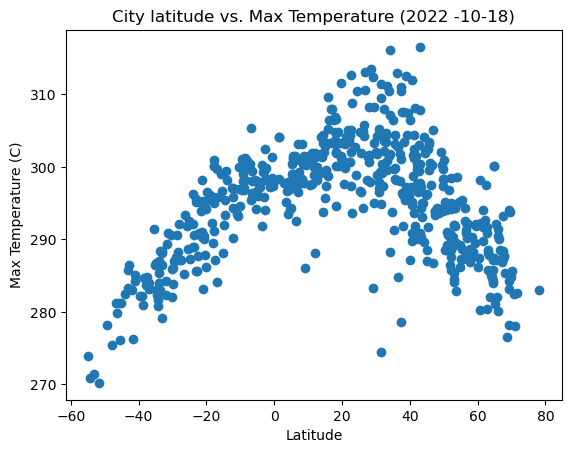

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
scatter = plt.scatter(latitude,temp)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City latitude vs. Max Temperature (2022 -10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

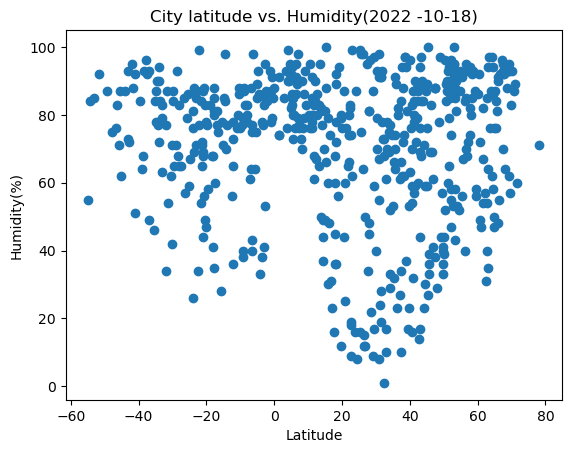

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
humidity_scatter = plt.scatter(latitude,humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City latitude vs. Humidity(2022 -10-18)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

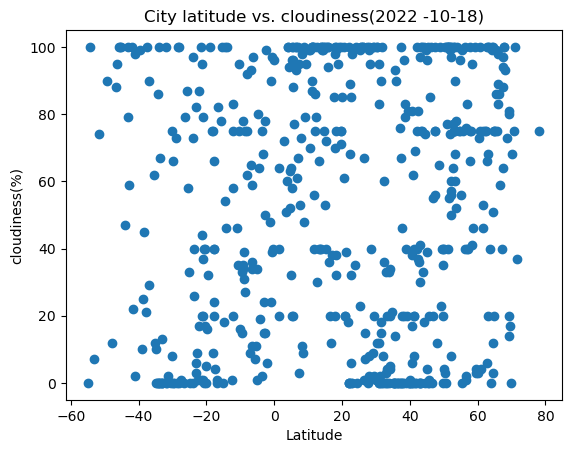

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
cloud_scatter = plt.scatter(latitude,cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.title("City latitude vs. cloudiness(2022 -10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

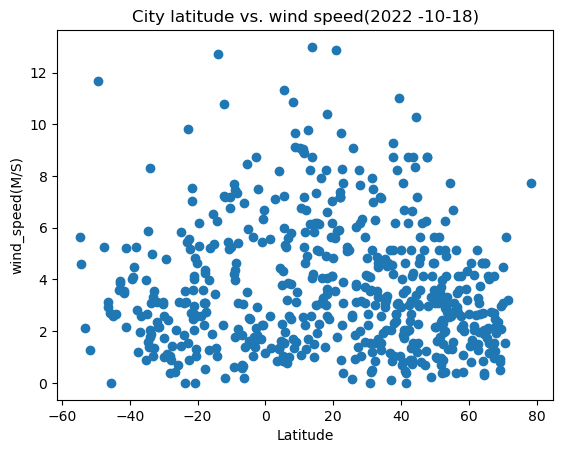

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
wind_scatter = plt.scatter(latitude,wind_speed)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("wind_speed(M/S)")
plt.title("City latitude vs. wind speed(2022 -10-18)")

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regression_values = x_values * slope + intercept
    line_equation = str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values, "r-")
    print(f"r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vorkuta,67.5000,64.0000,287.62,92,97,0.95,RU,1690500543
3,nemuro,43.3236,145.5750,290.27,97,75,0.72,JP,1690500543
4,cody,44.5263,-109.0565,302.27,30,0,10.29,US,1690500486
5,petropavlovsk-kamchatsky,53.0452,158.6483,284.48,100,100,2.00,RU,1690500544
7,aasiaat,68.7098,-52.8699,276.47,88,73,2.34,GL,1690500544


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,281.15,76,88,2.95,NZ,1690500543
1,santa cruz,-17.8000,-63.1667,291.18,88,40,3.09,BO,1690500543
6,huarmey,-10.0681,-78.1522,294.56,76,16,5.24,PE,1690500544
11,adamstown,-25.0660,-130.1015,292.58,59,33,1.43,PN,1690500493
12,port-aux-francais,-49.3500,70.2167,278.24,87,90,11.69,TF,1690500546


###  Temperature vs. Latitude Linear Regression Plot

r-value is: 0.34861655004193715


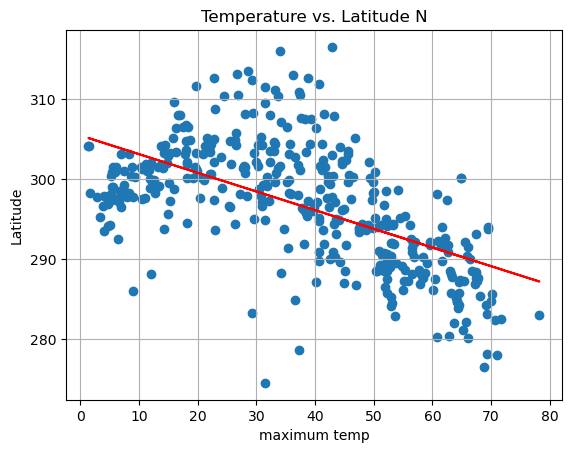

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title("Temperature vs. Latitude N")
plt.ylabel("Latitude")
plt.xlabel("maximum temp")
plt.grid(True)
plot_linear_regression(x_values,y_values)


r-value is: 0.7739126546221218


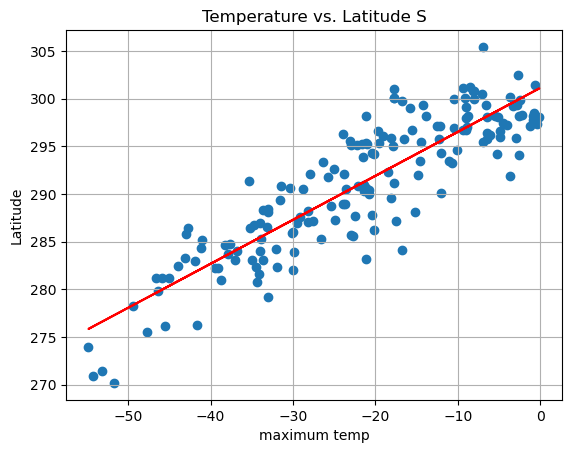

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title("Temperature vs. Latitude S")
plt.ylabel("Latitude")
plt.xlabel("maximum temp")
plt.grid(True)
plot_linear_regression(x_values,y_values)


**Discussion about the linear relationship:** It can be seen that for the southern hemisphere there is a upward trend for latitude going toward the equator and Max temperature of the city. while tha north seems to have a much less of a correlation but still seeing that Max temp lowers as you go further from the equator. 

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.000707712803531296


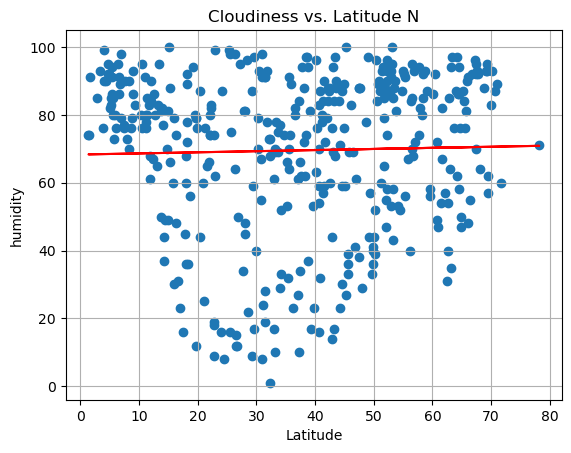

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title("Cloudiness vs. Latitude N")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)

r-value is: 0.005349210385275729


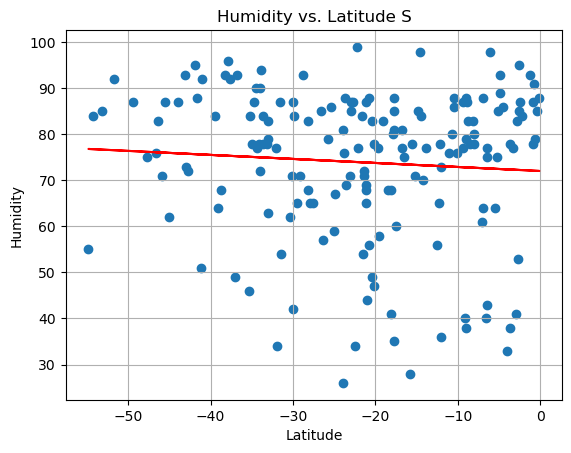

In [18]:
# # Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.title("Humidity vs. Latitude S")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** Huimdity no matter the latitude, does not seem to correlate well. there may be slight changes but the data varies wildly. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.002674049048023762


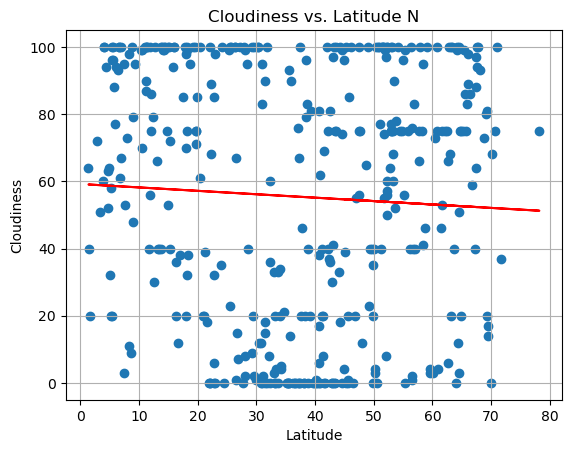

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.title("Cloudiness vs. Latitude N")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)


r-value is: 0.0002776258418270353


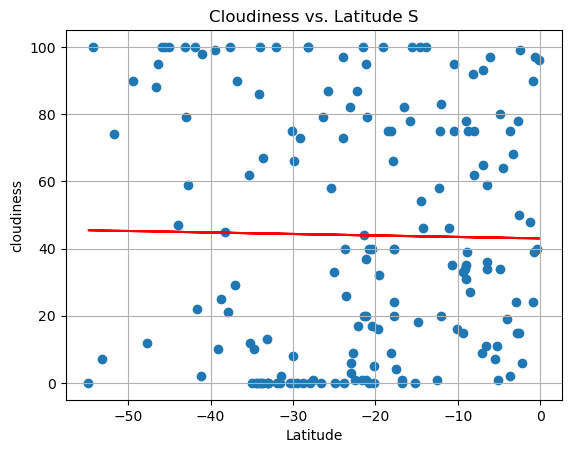

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.title("Cloudiness vs. Latitude S")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** Even more than the humidity, cloudiness has little to no correlation to distance from the equator. this can be seen by the extreme points on each plot no matter the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.0803175100606156


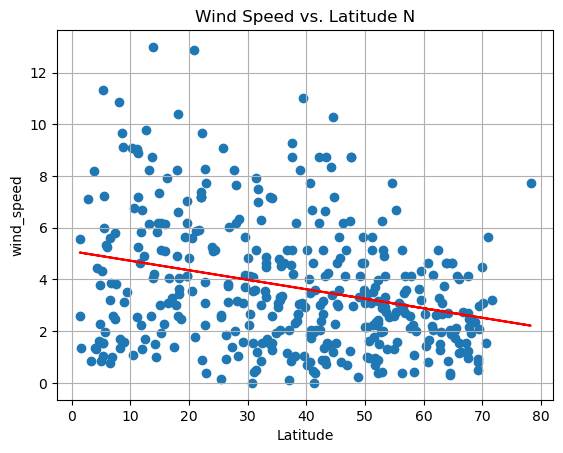

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.title("Wind Speed vs. Latitude N")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)

r-value is: 0.007971116740189063


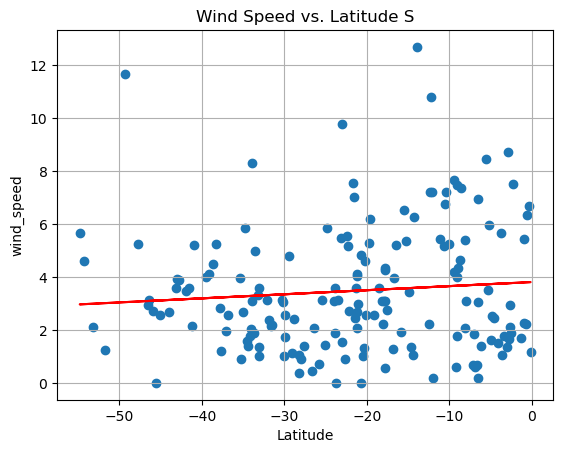

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.title("Wind Speed vs. Latitude S")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** Wind speed seems to stay somewhat low in the southern hemipshere, and slows down slightly the closer to the equator. 